<a href="https://colab.research.google.com/github/SirvavialTAG/MachineLearning/blob/main/Lab6_(%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 6. Обучение без учителя

## **Цель занятия:**
Изучить методы обучения без учителя, познакомиться с алгоритмами кластеризации, понять их применение и реализовать модели кластеризации с использованием различных алгоритмов.

## **Задание состоит из следующих частей:**
1. Определение обучения без учителя
2. Разбор алгоритмов DBSSCAN, K-means
3. Метрики качества кластеризации
4. Пример полезных задач, которые решает кластеризация

## Задачи для домашки ⏰

1. Преобразовать датасет
2. Построить кластеры
3. Описать результат полученных кластеров (для K-Means и DBSSCAN)
4. Объяснить метрики качества

**По желанию**

1. Спарсить данные по статьям (например lenta.ru или naked-science.ru)
2. Преобразовать текста статьи (по принципу описанному в последнем пункте)
3. Оценить метрики качества, провести аналитику кластеров (можно не максимально подробно, если получилось слишком много кластеров)

## Предобработка (все по классике)

Открываем датасет, преобразуем данные, идем дальше

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('bank.csv')

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Преобразование категориальных фич

In [ ]:
# Переводим столбцы с типом данных 'object' в тип данных 'category'
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  deposit    45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [ ]:
# Создаем копию данных
category_columns: list[str] = df.select_dtypes(include=['category']).columns # собираем колонки помеченные как objects

# Применяем One-Hot Encoding
df = pd.get_dummies(df, columns=category_columns, drop_first=True)

### Преобразование непрерывных фич

In [ ]:
# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.198658,0.032258,0.000000,0.000000,False,False,False,...,False,False,False,True,False,False,False,False,True,True
45207,0.688312,0.088501,0.533333,0.092721,0.016129,0.000000,0.000000,False,False,False,...,False,False,False,True,False,False,False,False,True,True
45208,0.701299,0.124689,0.533333,0.229158,0.064516,0.212156,0.010909,False,False,False,...,False,False,False,True,False,False,False,True,False,True
45209,0.506494,0.078868,0.533333,0.103294,0.048387,0.000000,0.000000,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
for col in df.columns:
  if df[col].dtype == 'bool':
    df[col] = df[col].astype('int64')

In [ ]:
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.198658,0.032258,0.000000,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,0.688312,0.088501,0.533333,0.092721,0.016129,0.000000,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,0.701299,0.124689,0.533333,0.229158,0.064516,0.212156,0.010909,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,0.506494,0.078868,0.533333,0.103294,0.048387,0.000000,0.000000,1,0,0,...,0,0,0,1,0,0,0,0,1,0


## О кластеризации и задачи обучения без учителя

#### Обучение с учителем

Представьте, что у вас есть список задач с правильными ответами. Например, вам дали примеры: «Это яблоко», «Это груша».

Задача — научиться отличать их, чтобы потом, когда вы увидите новый фрукт, вы смогли правильно его назвать. То есть у вас есть **учитель** — тот, кто заранее всё объяснил и дал правильные ответы.  

#### Обучение без учителя

А теперь представьте, что вам дали корзину фруктов, но никто не сказал, как они называются.

Задача — посмотреть на фрукты и найти, что у них общего, например: круглые положить в одну группу, длинные в другую. Тут вы работаете **без подсказок** и сами решаете, как группировать.  

#### Разница

- В задачах с учителем есть правильные ответы, и мы обучем алгоритм делать предсказания на основе примеров.  
- В задачах без учителя правильных ответов нет, ищем закономерности и пытаемся найти смысл группировки данные самостоятельно.

Пример:


1. **С учителем**: Мы ищем лучшее вино.  
2. **Без учителя**: Мы пытаемся объеденить вина, чтобы понять по какому принципу они объеденяются.  

## K-means

**K-means** — это алгоритм кластеризации, который делит данные на 𝑘 групп (кластеров). Основная идея: найти центры кластеров так, чтобы точки внутри одного кластера были ближе друг к другу, чем к точкам из других кластеров.

1. Инициализация: выбираем 𝑘 случайных центров (центроидов).
2. Присвоение точек: каждая точка относится к ближайшему центру.
Обновление центров: пересчитываем центры кластеров как среднее всех точек в кластере.
3. Повторяем шаги 2–3, пока центры не перестанут меняться или не достигнем максимального числа итераций.

In [ ]:
! pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.6 MB/s eta 0:00:00


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output


def interactive_kmeans_visualization(X, max_clusters=10, max_iterations=50):

    # преобразуем X в numpy array
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_kmeans_iteration(X, centroids, labels=None, step=0):
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        if labels is not None:
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        plt.title(f'K-means Iteration {step}')
        plt.legend()
        plt.show()

    def k_means_interactive(X, k, max_iters):
        np.random.seed(42)
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        for step in range(max_iters):
            # distances = np.sqrt(np.sum((X[:, np.newaxis] - centroids)**2, axis=2))
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X, centroids, labels, step)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X, k, max_iters)

    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)

# Берем датасет и визуализируем K-means
interactive_kmeans_visualization(df[:100])

interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

### K-means через реализацию skelarn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Определяем количество кластеров k
k = 4  # Вы можете изменить это значение в соответствии с вашими данными

# Создаем и обучаем модель KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

# Добавляем метки кластеров в исходный DataFrame
df_k_means = df.copy()
df_k_means['Cluster'] = labels

# Вывод статистики по кластерам для каждого признака
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_k_means.groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if k > 1:
    silhouette_avg = silhouette_score(df, labels)
    print(f"\nКоэффициент силуэта для k={k}: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен для k=1")

Статистика по кластерам:

Статистика для признака 'age':
             mean       std       min       max
Cluster                                        
0        0.285215  0.129477  0.038961  0.922078
1        0.203675  0.103769  0.000000  0.883117
2        0.300949  0.114710  0.025974  0.623377
3        0.360969  0.141602  0.025974  1.000000

Статистика для признака 'balance':
             mean       std       min       max
Cluster                                        
0        0.089037  0.035186  0.010640  1.000000
1        0.082817  0.021444  0.000000  0.588764
2        0.081359  0.018796  0.042725  0.604316
3        0.085516  0.027495  0.053538  0.810043

Статистика для признака 'day':
             mean       std  min  max
Cluster                              
0        0.501446  0.282572  0.0  1.0
1        0.482089  0.280071  0.0  1.0
2        0.457450  0.262418  0.0  1.0
3        0.515317  0.277803  0.0  1.0

Статистика для признака 'duration':
             mean       std       

#### **Анализ кластеров**



После применения алгоритма K-means с количеством кластеров \( k=4 \), мы получили четыре группы клиентов банка. Рассмотрим несколько наиболее значимых признаков, по которым кластеры существенно различаются:

1. **job_blue-collar:**
   - **Кластер 0** состоит из людей не рабочего класса (всего лишь **7.6%** рабочих) (значение `mean = 0.0077`).
   - **Кластер 1** и **Кластер 3** состоят на четверть из людей рабочего класса (значение `mean = 0.2299` и `mean = 0.2491`).
   - **Кластер 2** состоит почти наполовину из людей рабочего класса (**44%** рабочих) (значение `mean = 0.4394`).

2. **month_may:**
   - **Кластер 0** состоит из **17.5%** людей, которые активно контактировали с банком в мае (значение `mean = 0.175344`).
   - **Кластер 1** состоит из **40.6%** людей, которые активно контактировали с банком в мае (значение `mean = 0.405891`).
   - **Кластер 2** состоит из **86.5%** (Это самое высокое значение среди всех кластеров)  людей, которые активно контактировали с банком в мае (значение `mean = 0.864626`).
   - **Кластер 3** состоит из всего лишь **1.6%** (Это самое низкое значение среди всех кластеров) людей, которые активно контактировали с банком в мае (значение `mean = 0.016164`).

3. **housing_yes:**
   - **Кластер 0** состоит из **45%** людей (почти половина), которые имеют жилищный кредит в банке (значение `mean = 0.446295`).
   - **Кластер 1** состоит из **60%** людей, которые имеют жилищный кредит в банке (значение `mean = 0.600681`).
   - **Кластер 2** состоит из целых **94%** (Самое высокое значение среди всех кластеров) людей, которые имеют жилищный кредит в банке (значение `mean = 0.941430`).
   - **Кластер 3** состоит из **39%** (Самое низкое значение среди всех кластеров)  людей, которые имеют жилищный кредит в банке (значение `mean = 0.389480`).

4. **education_tertiary:**
   - **Кластер 0** состоит из **98%** людей (почти все люди в кластере!), которые имеют высшее образование (значение `mean = 0.0.979753`).
   - **Кластер 1** и **Кластер 2** состоят на небольшой процент из людей с высшем образованием (значение `mean = 0.051983` и `mean = 0.035916`).
   - **Кластер 3** вообще не состоит из людей, имеющих высшее образование (0%) (значение `mean = 0`).

5. **marital_married:**
   - **Кластер 0** состоит из **54%** людей, находящихся в браке (значение `mean = 0.543543`).
   - **Кластер 1** не состоит из людей, находящихся в браке (значение `mean = 0`).
   - **Кластер 2** и **Кластер 3** состоят из **85%** людей, находящихся в браке (значение `mean = 0.846944` и `mean = 0.848397`).

**Интерпретация полученного значения:**
   - Для **кластера 0** характерны семейные клиенты с высшим образованием, около половины которых имеют жилищный кредит. Они не относятся к рабочему классу и менее активны в контактах с банком в мае.
   - Для **кластера 1** характерны клиенты, которые не состоят в браке и не имеют высшего образования. Большинство из них пользуются жилищным кредитом. Они могут относиться к рабочему классу и проявляют большую активность в общении с банком в мае, чем клиенты из **кластера 0**.
   - Для **кластера 2** характерны семейные клиенты, не имеющих высшее образованием. Почти все клиенты имеют жилищный кредит. Они с большой вероятностью относятся к рабочему классу и самые активны в контактах с банком в мае.
   - Для **кластера 3** характерны семейные клиенты, не имеющих высшее образованием. Большинство из них не миеют жилищного кредита. Они могут относиться к рабочему классу и почти вступают в контакт с банком в мае.

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# Кластеризация K-means
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(df)

# Индекс Калински-Харабаза
ch_score_kmeans = calinski_harabasz_score(df, labels_kmeans)
print(f"Индекс Калински-Харабаза для K-means: {ch_score_kmeans:.4f}")

# Индекс Дэвиса-Болдина
db_score_kmeans = davies_bouldin_score(df, labels_kmeans)
print(f"Индекс Дэвиса-Болдина для K-means: {db_score_kmeans:.4f}")

# Коэффициент силуэта
sh_score_kmeans = silhouette_score(df, labels_kmeans)
print(f"Коэффициент силуэта для K-means: {sh_score_kmeans:.4f}")

Индекс Калински-Харабаза для K-means: 4682.8797
Индекс Дэвиса-Болдина для K-means: 2.3906
Коэффициент силуэта для K-means: 0.1056


1. **Индекс Калински-Харабаза \( k=4 \): 4682.8797:**
   - **Описание:** Измеряет отношение между разбросом между кластерами и разбросом внутри кластеров.
   - **Диапазон значений:** От 0 до бесконечности.
   - **Интерпретация:** Чем ближе к бесконечности больше, тем лучше раздленеие между кластерами

2. **Индекс Дэвиса-Болдина \( k=4 \): 2.3906:**
   - **Описание:** Оценивает среднее "сходство" между каждым кластером и наиболее похожим на него другим кластером. Сходство основано на расстоянии между кластерами и их размером.
   - **Диапазон значений:** От 0 до бесконечности.
   - **Интерпретация:** Чем ближе к 0, тем лучшее разделение между кластерами.

3. **Коэффициент силуэта для \( k=4 \): 0.1056:**

    - **Описание:** Измеряет, насколько объект похож на свой кластер по сравнению с другими кластерами.
    - **Диапазон значений:** От -1 до 1.
    - **Интерпретация:** Значения, близкие к 1, указывают на хорошую кластеризацию. Значения около 0 означают, что кластеры перекрываются. Отрицательные значения указывают на возможные ошибки в кластеризации.

### DBSSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, основанный на плотности точек в пространстве.

Параметры алгоритма:

- **Epsilon (eps)**: радиус окрестности точки.
- **Min_samples**: минимальное количество точек в eps-окрестности для того, чтобы точка считалась ядром кластера.

Классификация точек:

- **Core point (ядро)**: если в eps-окрестности точки находится не менее min_samples точек, то она является ядром.
- **Border point (граничная точка)**: точка, которая находится в eps-окрестности ядра, но сама не является ядром.
- **Noise point (шум)**: точка, которая не является ни ядром, ни граничной точкой. (**входит в кластер -1**)

Точки, которые связаны по плотности (через ядра и их eps-окрестности), объединяются в один кластер.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def interactive_dbscan_visualization(X):
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для настройки параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                                       value='euclidean', description='metric:')

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {'eps': eps_slider, 'min_samples': min_samples_slider, 'metric': metric_dropdown})
    display(ui, out)

# Пример использования
interactive_dbscan_visualization(df[:120])

Output()

### DBSSCAN через sklearn

Количество кластеров: 1501
Статистика по кластерам:

Статистика для признака 'age':
             mean       std       min       max  count
Cluster                                               
0        0.294714  0.107954  0.064935  0.545455    329
1        0.208053  0.094213  0.051948  0.506494    199
2        0.283550  0.111696  0.155844  0.506494     12
3        0.337058  0.111076  0.103896  0.545455     86
4        0.209416  0.102459  0.090909  0.480519     32
...           ...       ...       ...       ...    ...
1496     0.270130  0.103245  0.129870  0.402597      5
1497     0.301299  0.157834  0.181818  0.545455      5
1498     0.080087  0.017262  0.051948  0.103896      6
1499     0.140260  0.046282  0.103896  0.207792      5
1500     0.272727  0.107487  0.116883  0.376623      5

[1501 rows x 5 columns]

Статистика для признака 'balance':
             mean       std       min       max  count
Cluster                                               
0        0.088631  0.034542  0

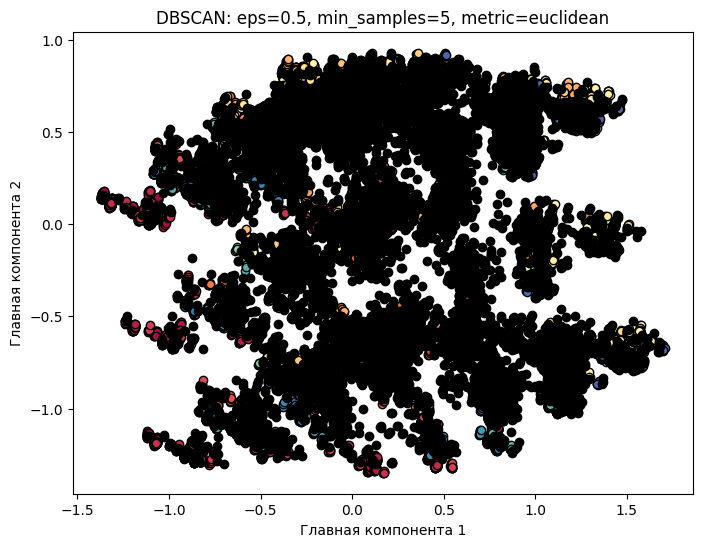

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Параметры DBSCAN
eps = 0.5
min_samples = 5
metric = 'euclidean'

# Обучение модели DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
labels = db.fit_predict(df)

# Добавляем метки кластеров в DataFrame
df_dbscan = df.copy()
df_dbscan['Cluster'] = labels

# Количество кластеров (исключая шум)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Количество кластеров: {n_clusters_}")

# Вывод статистики по кластерам
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max', 'count'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(df[df_dbscan['Cluster'] != -1], labels[df_dbscan['Cluster'] != -1])
    print(f"\nКоэффициент силуэта для DBSCAN: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен, так как найден один кластер или данные являются шумом.")


# Визуализация результатов (с использованием PCA для снижения размерности)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, 1]
    plt.plot(df_pca.loc[class_member_mask, 'PC1'],
             df_pca.loc[class_member_mask, 'PC2'],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()


In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(df)

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = df[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")


Индекс Калински-Харабаза для DBSCAN: 1030.6498
Индекс Дэвиса-Болдина для DBSCAN: 0.4453
Коэффициент силуэта для DBSCAN: 0.7006


Количество кластеров: 2
Статистика по кластерам:

Статистика для признака 'age':
             mean       std       min       max  count
Cluster                                               
0        0.295357  0.133128  0.000000  1.000000  42359
1        0.085343  0.044208  0.012987  0.168831     28

Статистика для признака 'balance':
             mean       std       min       max  count
Cluster                                               
0        0.084915  0.027092  0.000000  1.000000  42359
1        0.087507  0.040659  0.072803  0.289588     28

Статистика для признака 'day':
             mean       std  min       max  count
Cluster                                          
0        0.494617  0.275252  0.0  1.000000  42359
1        0.594048  0.287612  0.0  0.966667     28

Статистика для признака 'duration':
             mean       std      min       max  count
Cluster                                              
0        0.051781  0.051633  0.00000  1.000000  42359
1        0.0

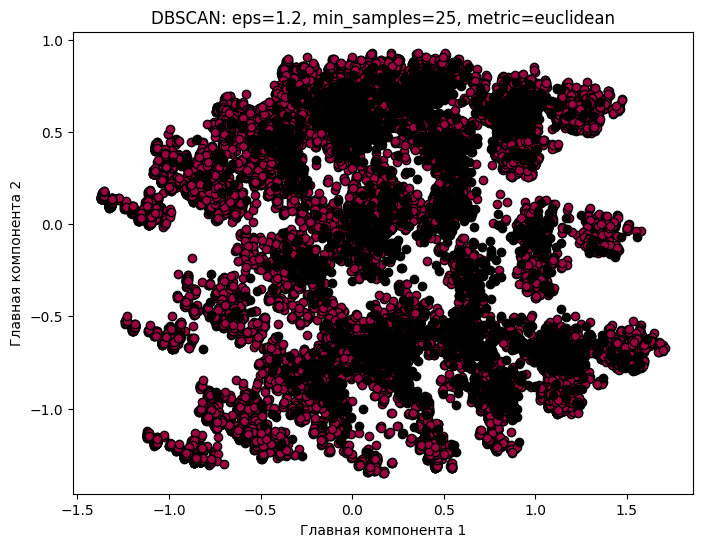

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Параметры DBSCAN
eps = 1.2
min_samples = 25
metric = 'euclidean'

# Обучение модели DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
labels = db.fit_predict(df)

# Добавляем метки кластеров в DataFrame
df_dbscan = df.copy()
df_dbscan['Cluster'] = labels

# Количество кластеров (исключая шум)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Количество кластеров: {n_clusters_}")

# Вывод статистики по кластерам
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max', 'count'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(df[df_dbscan['Cluster'] != -1], labels[df_dbscan['Cluster'] != -1])
    print(f"\nКоэффициент силуэта для DBSCAN: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен, так как найден один кластер или данные являются шумом.")


# Визуализация результатов (с использованием PCA для снижения размерности)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, 1]
    plt.plot(df_pca.loc[class_member_mask, 'PC1'],
             df_pca.loc[class_member_mask, 'PC2'],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()


In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

eps = 1.2
min_samples = 25

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(df)

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = df[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")


Индекс Калински-Харабаза для DBSCAN: 43.2466
Индекс Дэвиса-Болдина для DBSCAN: 1.1926
Коэффициент силуэта для DBSCAN: 0.1545


#### Визуальный пример

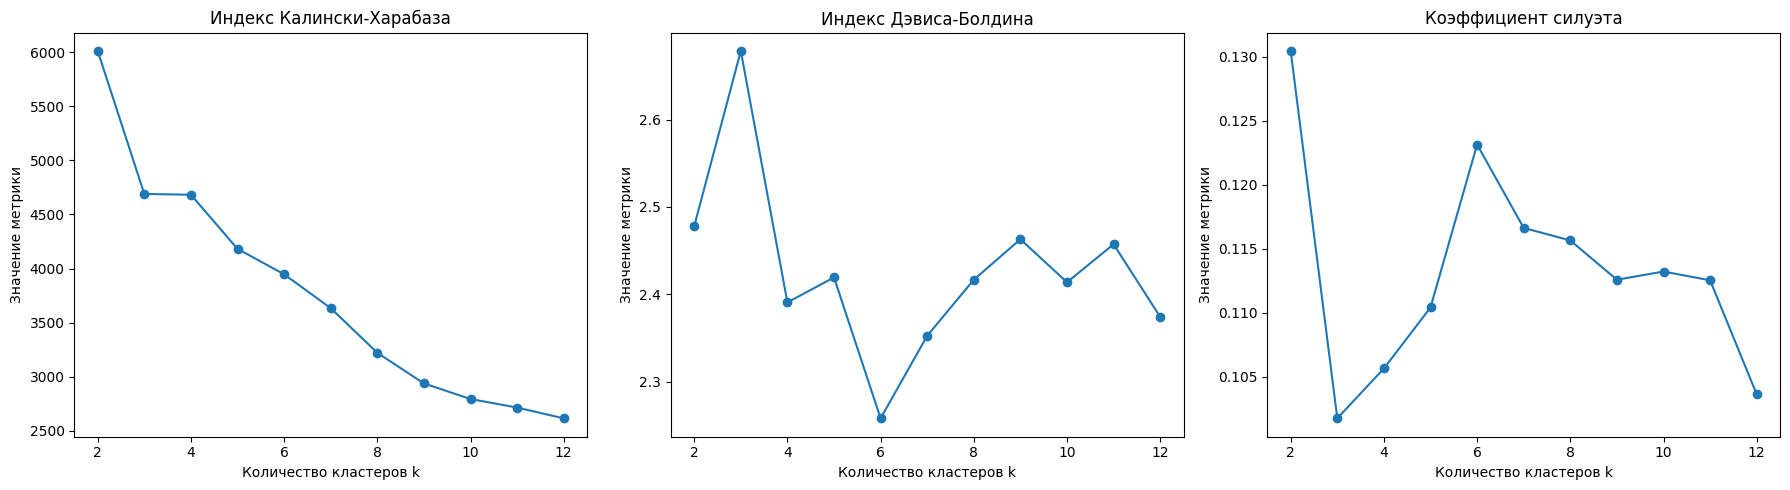

In [ ]:
# Диапазон значений k
k_range = range(2, 13)

# Списки для хранения метрик
ch_scores = []
db_scores = []
silhouette_scores = []

for k in k_range:
    # Создаем и обучаем модель KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)

    # Вычисляем метрики
    ch_score = calinski_harabasz_score(df, labels)
    db_score = davies_bouldin_score(df, labels)
    silhouette_avg = silhouette_score(df, labels)

    # Сохраняем метрики
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

# Построение графиков
plt.figure(figsize=(18, 5))

# График Индекса Калински-Харабаза
plt.subplot(1, 3, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Индекс Калински-Харабаза')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Индекса Дэвиса-Болдина
plt.subplot(1, 3, 2)
plt.plot(k_range, db_scores, marker='o')
plt.title('Индекс Дэвиса-Болдина')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Коэффициента силуэта
plt.subplot(1, 3, 3)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

plt.tight_layout()
plt.show()


# Пример обработки текстовых данных

In [ ]:
pip install nltk pymorphy2 scikit-learn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 22.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=2f2c725ab7edd5f765d0bc2fcbb2e5470c633536188b2f44f067135229b7cf17
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pymorphy2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Инициализация текстовых анализаторов

In [ ]:
# Инициализируем лемматизатор и список стоп-слов
morph = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

# Чтение данных из файла
with open('newsvl.txt', 'r', encoding='utf-8') as f:
    content = f.read()

# Удаляем лишние символы
content = content.replace('\xa0', ' ')

# Разделяем данные на статьи
articles_raw = content.split('==========')

# Извлекаем заголовки и тексты статей
titles = []
texts = []

for article in articles_raw:
    lines = article.strip().split('\n')
    if len(lines) >= 3:
        # Извлекаем заголовок и текст статьи
        title = lines[1]
        text = ' '.join(lines[2:])
        titles.append(title)
        texts.append(text)

In [ ]:
texts

['Суд в Приморье оштрафовал на 100 тыс. рублей и конфисковал Mazda CX-3 у жительницы Пограничного округа, которая неоднократно садилась за руль нетрезвой, однажды в салоне бы её трёхлетний сын. Усугубило ситуацию то, что водительского удостоверения она никогда не получала. В судебном заседании установлено, что в октябре 2024 года женщина в состоянии опьянения управляла принадлежащим ей автомобилем Mazda CX-3 и была задержана сотрудниками ГИБДД в посёлке городского типа Пограничный. При этом ранее женщина уже привлекалась к административной ответственности за аналогичное деяние, однако должных выводов для себя не сделала. Суд признал женщину виновной по части 1 статьи 264.1 УК РФ («Управление автомобилем лицом, находящимся в состоянии опьянения, подвергнутым административному наказанию за управление транспортным средством в состоянии опьянения»). Кроме того, в связи с тем, что в момент нетрезвого вождения в салоне находился 3-летний сын нарушительницы, она также привлечена к администрат

In [ ]:
titles

['Mazda CX-3 конфисковали у жительницы Приморья, которая, не имея прав, не раз садилась за руль нетрезвой',
 'Водой из домов на Тихой заливает «ледяную горку» на тротуаре (ФОТО)',
 'Неисправная машина опрокинулась в кювет в Хорольском округе, два человека погибли и ещё двое пострадали',
 'Суды, деньги, два подрядчика: детсад на Постышева во Владивостоке не успели отремонтировать вовремя',
 'Сладкие губернаторские подарки для детей Владивостока, которые не ходят в садики и школы, можно будет получить с 23 декабря',
 '«РемиСити» откроется в Артёме',
 'Китай увеличил срок безвизового транзита до 10 дней',
 'БК «Динамо» вырвал победу у «Югры» в выездном матче Суперлиги',
 'Более 70 катков во всех районах города будут работать этой зимой для жителей и гостей Владивостока',
 'Протестировать склон и канатную дорогу на горнолыжном курорте в Арсеньеве в феврале смогут до 500 человек',
 'В Большом Камне возбудили дело о хищении средств пайщиков кооператива «Время»',
 'Конфликтного тигра отловили

#### Предварительная обработка текстовых данных

1. преобразуем в lowercase
2. оставляем только слова
3. токенизируем текста
4. преобразуем слова в начальную форму

In [ ]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [ ]:
def preprocess_text(text):
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем пунктуацию и цифры
    text = re.sub(r'[^а-яё\s]', '', text)
    # Токенизация
    words = text.split()
    # Удаление стоп-слов и лемматизация
    lemmatized = []
    for word in words:
        if word not in russian_stopwords:
            lemma = morph.parse(word)[0].normal_form
            lemmatized.append(lemma)
    return ' '.join(lemmatized)

# Применяем предобработку к каждому тексту
texts_preprocessed = [preprocess_text(text) for text in texts]

In [ ]:
texts_preprocessed

['суд приморье оштрафовать тыс рубль конфисковать жительница пограничный округ который неоднократно садиться руль нетрезвый однажды салон её трёхлетний сын усугубить ситуация водительский удостоверение получать судебный заседание установить октябрь год женщина состояние опьянение управлять принадлежащий автомобиль задержать сотрудник гибдд посёлок городской тип пограничный ранее женщина привлекаться административный ответственность аналогичный деяние однако должный вывод сделать суд признать женщина виновный часть статья ук рф управление автомобиль лицо находиться состояние опьянение подвергнуть административный наказание управление транспортный средство состояние опьянение кроме связь момент нетрезвый вождение салон находиться летний сын нарушительница также привлечь административный ответственность статья коап рф водительский удостоверение женщина также получать привлечь ответственность часть статья коап рф суд назначить наказание вид штраф размер тыс рубль лишение право заниматься д

#### Преобразуем в векторный вид

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts_preprocessed)

In [ ]:
# Параметры DBSCAN могут требовать подбора
dbscan = DBSCAN(eps=0.8, min_samples=2, metric='cosine')
labels = dbscan.fit_predict(X)

In [ ]:
# Создаем DataFrame с заголовками и метками кластеров
df = pd.DataFrame({'title': titles, 'label': labels})

# Выводим количество кластеров
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
print(f'Количество кластеров: {n_clusters}')

# Анализируем кластеры
for label in unique_labels:
    if label == -1:
        continue  # Пропускаем шум
    cluster_titles = df[df['label'] == label]['title'].head(3)
    print(f'\nКластер {label}:')
    for title in cluster_titles:
        print(f'- {title}')

Количество кластеров: 22

Кластер 0:
- Mazda CX-3 конфисковали у жительницы Приморья, которая, не имея прав, не раз садилась за руль нетрезвой
- Неисправная машина опрокинулась в кювет в Хорольском округе, два человека погибли и ещё двое пострадали
- Суды, деньги, два подрядчика: детсад на Постышева во Владивостоке не успели отремонтировать вовремя

Кластер 1:
- Водой из домов на Тихой заливает «ледяную горку» на тротуаре (ФОТО)
- Новый светофор на Героев-Тихоокеанцев постоянно показывает последнюю секунду зелёного (ВИДЕО)
- Более 500 домов в Первомайском районе Владивостока осталось без холодной и горячей воды (ОБНОВЛЕНО)

Кластер 2:
- БК «Динамо» вырвал победу у «Югры» в выездном матче Суперлиги
- «Адмирал» разгромил «Амур» в 200-м матче Леонида Тамбиева на посту главного тренера
- ХК «Адмирал» в четвертый раз обыграл хабаровский «Амур» в текущем сезоне КХЛ и поднялся на пятое место Восточной конференции – 4:1

Кластер 3:
- Более 70 катков во всех районах города будут работать этой з

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Применяем PCA для уменьшения размерности до 3 компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Создаем DataFrame для визуализации
df_plot = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'PC3': X_pca[:, 2],
    'title': titles,
    'label': labels
})

# Создаем 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_plot['PC1'],
    y=df_plot['PC2'],
    z=df_plot['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_plot['label'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=df_plot['title'],
    hovertemplate='%{text}<extra></extra>'
)])

# Настраиваем внешний вид графика
fig.update_layout(
    title='3D PCA визуализация статей',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

# Генерируем кадры для анимации вращения графика
frames = []
for angle in range(0, 360, 10):
    camera = dict(
        eye=dict(x=2*np.cos(np.radians(angle)), y=2*np.sin(np.radians(angle)), z=1.5)
    )
    frames.append(go.Frame(layout=dict(scene_camera=camera)))

# Добавляем кадры в график
fig.frames = frames

# Добавляем кнопки управления анимацией
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        y=0.8,
        x=1.05,
        xanchor='left',
        yanchor='top',
        buttons=[dict(label='Вращать',
                      method='animate',
                      args=[None, dict(frame=dict(duration=50, redraw=True),
                                       transition=dict(duration=0),
                                       fromcurrent=True,
                                       mode='immediate')])]
    )]
)

# Отображаем график
fig.show()